##  reading companies and rounds2 from delimited files into dataframes.

# # Read rounds2 data from an excel file csv format

In [2]:
import numpy as np
import pandas as pd


#companies.head()
rounds2 = pd.read_csv("rounds2.csv",sep = "\\,",encoding = "Palmos",engine = 'python')
rounds2.company_permalink = rounds2.company_permalink.str.encode('Palmos').str.decode('ascii','ignore')
rounds2.head()
#cleaning data
rounds2.isna().any()
#calculate the percentage of nan values
round(100*(rounds2.isnull().sum()/len(rounds2.index)),2)
#removing thefunding_round_code which has huge percentage of missing values
rounds2 = rounds2.drop('funding_round_code',axis = 1)
round(100*(rounds2.isnull().sum()/len(rounds2.index)),2)
#treating missing values in rows
rounds2[rounds2.isnull().sum(axis=1)<5]
#count the number of rows having less than 5 null values
len(rounds2[rounds2.isnull().sum(axis=1)<5].index)
#calculate percentage 
round(100*(len(rounds2[rounds2.isnull().sum(axis=1)<5].index)/len(rounds2.index)))
round(100*(rounds2.isnull().sum()/len(rounds2.index)),2)
rounds2['raised_amount_usd'].describe()
#since max and min have too much difference we try to drop those or replace by median
rounds2[np.isnan(rounds2['raised_amount_usd'])]
#rounds2.loc[np.isnan(rounds2['raised_amount_usd']),['raised_amount_usd']]=rounds2['raised_amount_usd'].median()
rounds2=rounds2.replace(to_replace = np.nan, value=0)
round(100*(rounds2.isnull().sum()/len(rounds2.index)),2)
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,14-10-2014,0.0
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0


In [3]:
#read the compaines data
companies = pd.read_csv("companies.txt",sep="\t",encoding = "Palmos")

companies.permalink = companies.permalink.str.encode('Palmos').str.decode('ascii','ignore')
companies.head()
companies.isna().all()

#changing the dataframes into lowercase
companies = companies.apply(lambda x: x.astype(str).str.lower())
rounds2 = rounds2.apply(lambda x :x.astype(str).str.lower())
#companies.head()
companies.isna().all()
companies = companies.replace(to_replace = np.nan, value=0)
companies.head()




,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,#fame,http://livfame.com,media,operating,ind,16,mumbai,mumbai,nan
1,/organization/-qounter,:qounter,http://www.qounter.com,application platforms|real time|social network...,operating,usa,de,de - other,delaware city,04-09-2014
2,/organization/-the-one-of-them-inc-,"(the) one of them,inc.",http://oneofthem.jp,apps|games|mobile,operating,nan,nan,nan,nan,nan
3,/organization/0-6-com,0-6.com,http://www.0-6.com,curated web,operating,chn,22,beijing,beijing,01-01-2007
4,/organization/004-technologies,004 technologies,http://004gmbh.de/en/004-interact,software,operating,usa,il,"springfield, illinois",champaign,01-01-2010


## To find the unique columns count in a dataframe
## to find the unique column name in companies dataframe

In [4]:

#unique companies present in companies
#companies.name.unique()
#count
companies['name'].nunique()

#unique companies present in rounds2
rounds2['company_permalink'].nunique()

#which column can be used as unique key for each company
companies['permalink'].duplicated().any()

False

In [5]:
#Are there any companies in the rounds2 file which are not  present in companies ? Answer Y/N.

a =  rounds2.loc[rounds2['company_permalink'].isin(companies['permalink']),:]
a.any()

company_permalink          True
funding_round_permalink    True
funding_round_type         True
funded_at                  True
raised_amount_usd          True
dtype: bool

## Merge the two data frames so that all variables (columns) in the companies frame are added to the rounds2 data frame. Name the merged frame master_frame. How many observations are present in master_frame?

In [6]:

        
#merging the two dataframes and finding the number of observations
master_frame = pd.merge(companies,rounds2,how = 'inner',left_on = 'permalink',right_on = 'company_permalink')
master_frame.head()
master_frame.shape

(114948, 15)

# check list 2

## Grouping the data on funding_round_type

In [7]:
investments_group = master_frame.groupby('funding_round_type')
investments_group


In [8]:
#changing the datatype to float
pd.options.display.float_format = '{:.2f}'.format
master_frame.raised_amount_usd = master_frame.raised_amount_usd.astype(float)
#master_frame.replace(to_replace = np.nan, value=0)
#applying function on grouped data 
x=investments_group['funding_round_type'].sum()
x=pd.DataFrame(investments_group['raised_amount_usd'].mean())
#x
y = x.loc[['seed','venture','angel','private_equity'],['raised_amount_usd']]
y
#y.nlargest(1,['raised_amount_usd'])

,raised_amount_usd
funding_round_type,
seed,556623.01
venture,10634054.44
angel,764564.35
private_equity,62111788.23


## Spark Funds wants to invest between 5 to 15 million USD per investment round, which investment type is the most suitable for it? Identify the investment type and, for further analysis, filter the data so it only contains the chosen investment type.

In [9]:
z=pd.DataFrame(master_frame.loc[(master_frame['raised_amount_usd']>5000000)&(master_frame['raised_amount_usd']<15000000),['funding_round_type']])
z.head()

,funding_round_type
0,venture
12,venture
21,private_equity
46,venture
50,venture


In [10]:

investments_group1 = z.groupby('funding_round_type')
investments_group1

R = investments_group1['funding_round_type'].count()
R
np.argmax(R)                                                                                              


C:\Users\Vasu\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:56: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  return getattr(obj, method)(*args, **kwds)


'venture'

##Checkpoint -- 3

In [11]:
#finding the top 9 countries for chosen funding type
top9 = master_frame.pivot_table(values = 'raised_amount_usd',index = 'country_code',columns = 'funding_round_type',aggfunc = 'mean')
Top9 = top9.nlargest(9,['venture'])
Top9


funding_round_type,angel,convertible_note,debt_financing,equity_crowdfunding,grant,non_equity_assistance,post_ipo_debt,post_ipo_equity,private_equity,product_crowdfunding,secondary_market,seed,undisclosed,venture
country_code,,,,,,,,,,,,,,
bmu,2300000.00,nan,160000000.00,nan,nan,nan,nan,nan,526666000.00,nan,nan,50000.00,nan,57760000.00
mys,321198.93,510000.00,95625000.00,nan,801428.12,nan,nan,nan,28622661.17,nan,nan,369504.19,1500.00,24529410.75
egy,11400.00,nan,73000000.00,nan,1075000.00,nan,nan,nan,52000000.00,nan,nan,135965.94,3000.00,19158928.57
chn,2453747.35,500000.00,386590583.75,0.00,109166.67,nan,239000000.00,243984615.38,391049048.26,458229.25,100000000.00,451741.64,29820701.73,19087407.17
lux,225659.40,198260.00,167100000.00,nan,45000.00,nan,nan,nan,nan,nan,nan,560525.00,1111775.00,18155033.90
tan,3000000.00,nan,13500000.00,nan,nan,nan,nan,nan,nan,1400000.00,nan,269000.00,nan,15890000.00
kna,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,15000000.00
twn,792696.00,nan,nan,nan,nan,nan,nan,nan,50838827.60,nan,nan,1105944.41,684306.50,14856654.40
maf,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,14621592.00


In [12]:
#Due to  time constraints i just used manual method instead of scraping
#web scraping
import numpy as np
import pandas as pd
import wikipedia as wp

# get the html source
html = wp.page("List_of_territorial_entities_where_English_is_an_official_language").html().encode("UTF-8")
df1 = pd.read_html(html)[0]
#df2 = pd.read_html(html)[1]
#df = pd.concat([df1,df2],axis = 1,sort = False)
df1 = df1.to_csv('beautifulsoup_pandas.csv',header = 0, index = False)
df1

## Checkpoint -- 4

In [13]:
#read the mapping file
import numpy as np
import pandas as pd
mapping = pd.read_csv("mapping.csv")
mapping.head()


,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [14]:
master_frame = master_frame.replace(to_replace = np.nan, value=0)
#split the category_list and use the string before pipe(|) as primary_list
p = master_frame.category_list.str.split("|",n=1,expand = True)
master_frame['primary_sector'] = p[0]
#master_frame = master_frame.apply(lambda x: x.astype(str).str.lower())
master_frame.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,primary_sector
0,/organization/-fame,#fame,http://livfame.com,media,operating,ind,16,mumbai,mumbai,nan,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.00,media
1,/organization/-qounter,:qounter,http://www.qounter.com,application platforms|real time|social network...,operating,usa,de,de - other,delaware city,04-09-2014,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,14-10-2014,0.00,application platforms
2,/organization/-qounter,:qounter,http://www.qounter.com,application platforms|real time|social network...,operating,usa,de,de - other,delaware city,04-09-2014,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,01-03-2014,700000.00,application platforms
3,/organization/-the-one-of-them-inc-,"(the) one of them,inc.",http://oneofthem.jp,apps|games|mobile,operating,nan,nan,nan,nan,nan,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,30-01-2014,3406878.00,apps
4,/organization/0-6-com,0-6.com,http://www.0-6.com,curated web,operating,chn,22,beijing,beijing,01-01-2007,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.00,curated web


In [15]:
master_frame1 = mapping.category_list = mapping.category_list.astype(str)
#create a column main_sector with mapping
master_frame1 = pd.get_dummies(mapping)
x=master_frame1.idxmax(1)
master_frame1['main_sector'] = x
master_frame1.head()
#master_frame1['main_sector']= main_sector
master_frame1.drop_duplicates()
#master_frame1['main_sector']= main_sector
#master_frame1.head()
merge_frame = pd.concat([master_frame,master_frame1],axis = 1)
#merge_frame = pd.merge(master_frame,master_frame1,how = 'outer', left_on = 'primary_sector',right_on = 'main_sector')
merge_frame.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,...,category_list_Wine And Spirits,category_list_Wireless,category_list_Women,category_list_Young Adults,category_list_iOS,category_list_iPad,category_list_iPhone,category_list_mHealth,category_list_nan,main_sector
0,/organization/-fame,#fame,http://livfame.com,media,operating,ind,16,mumbai,mumbai,nan,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,Blanks
1,/organization/-qounter,:qounter,http://www.qounter.com,application platforms|real time|social network...,operating,usa,de,de - other,delaware city,04-09-2014,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Manufacturing
2,/organization/-qounter,:qounter,http://www.qounter.com,application platforms|real time|social network...,operating,usa,de,de - other,delaware city,04-09-2014,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Manufacturing
3,/organization/-the-one-of-them-inc-,"(the) one of them,inc.",http://oneofthem.jp,apps|games|mobile,operating,nan,nan,nan,nan,nan,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Manufacturing
4,/organization/0-6-com,0-6.com,http://www.0-6.com,curated web,operating,chn,22,beijing,beijing,01-01-2007,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"Social, Finance, Analytics, Advertising"


In [16]:
pd.options.display.float_format = '{:.2f}'.format
#merge_frame.country_code = merge_frame.country_code.astype(str)
D1 = merge_frame.loc[(merge_frame['country_code']=='ind')&(merge_frame['funding_round_type'] == 'venture')&(merge_frame['raised_amount_usd']<15000000)&(merge_frame['raised_amount_usd']>5000000),:]
D1['totalNumber'] = D1.groupby('main_sector').raised_amount_usd.transform('count')
D1.drop_duplicates()
D1['total_sum']=D1.groupby('main_sector').raised_amount_usd.transform('sum')
D1.drop_duplicates()
D1 = D1.replace(to_replace = np.nan, value=0)
D1.head()


C:\Users\Vasu\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\Vasu\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,...,category_list_Women,category_list_Young Adults,category_list_iOS,category_list_iPad,category_list_iPhone,category_list_mHealth,category_list_nan,main_sector,totalNumber,total_sum
0,/organization/-fame,#fame,http://livfame.com,media,operating,ind,16,mumbai,mumbai,nan,...,0.00,0.00,0.00,0.00,0.00,0.00,1.00,Blanks,1.00,10000000.00
227,/organization/21diamonds-india,21diamonds,http://www.21diamonds.de,e-commerce,operating,ind,10,new delhi,gurgaon,01-06-2012,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Manufacturing,1.00,6369507.00
1049,/organization/a-little-world,a little world,http://alittleworld.com,finance,operating,ind,16,mumbai,mumbai,02-03-2000,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0.00,0.00
2507,/organization/adlabs-imagica,adlabs imagica,http://www.adlabsimagica.com,entertainment|tourism,operating,ind,16,ind - other,khopoli,nan,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0.00,0.00
3457,/organization/agile,agile,http://www.agile-ft.com,finance|finance technology|fintech|insurance,operating,ind,16,mumbai,mumbai,nan,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0.00,0.00


In [17]:
#pd.options.display.float_format = '{:.2f}'.format

#merge_frame.raised_amount_usd = merge_frame.raised_amount_usd.astype(float)
D2 = merge_frame.loc[(merge_frame['country_code']=='usa')&(merge_frame['funding_round_type'] == 'venture')&(merge_frame['raised_amount_usd']<15000000)&(merge_frame['raised_amount_usd']>5000000),:]
D2['totalNumber'] = D2.groupby('main_sector').raised_amount_usd.transform('count')
D2.drop_duplicates()
D2['totalsum'] = D2.groupby('main_sector').raised_amount_usd.transform('sum')
D2.drop_duplicates()
D2
D2.nlargest(35,['totalsum'])


C:\Users\Vasu\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\Vasu\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,...,category_list_Women,category_list_Young Adults,category_list_iOS,category_list_iPad,category_list_iPhone,category_list_mHealth,category_list_nan,main_sector,totalNumber,totalsum
216,/organization/2080-media,2080 media,nan,news,operating,usa,ga,atlanta,atlanta,01-01-2008,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Others,19.00,180987823.00
249,/organization/23andme,23andme,http://23andme.com,biotechnology|search,operating,usa,ca,sf bay area,mountain view,01-04-2006,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Others,19.00,180987823.00
290,/organization/28msec,28msec,http://www.28msec.com,cloud computing|databases|software|web develop...,operating,usa,ca,sf bay area,palo alto,01-01-2008,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Others,19.00,180987823.00
339,/organization/2u,2u inc.,http://2u.com,edtech|education|software,ipo,usa,md,md - other,hyattsville,01-01-2008,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Others,19.00,180987823.00
341,/organization/2u,2u inc.,http://2u.com,edtech|education|software,ipo,usa,md,md - other,hyattsville,01-01-2008,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Others,19.00,180987823.00
373,/organization/33across,33across,http://www.33across.com,advertising|advertising platforms|content disc...,operating,usa,ny,new york city,new york,01-09-2007,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Others,19.00,180987823.00
375,/organization/33across,33across,http://www.33across.com,advertising|advertising platforms|content disc...,operating,usa,ny,new york city,new york,01-09-2007,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Others,19.00,180987823.00
525,/organization/3pillar-global,3pillar global,http://www.3pillarglobal.com,consulting|software,operating,usa,va,"washington, d.c.",fairfax,01-08-2006,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Others,19.00,180987823.00
527,/organization/3pillar-global,3pillar global,http://www.3pillarglobal.com,consulting|software,operating,usa,va,"washington, d.c.",fairfax,01-08-2006,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Others,19.00,180987823.00
542,/organization/3scan,3scan,http://www.3scan.com,biotechnology,operating,usa,ca,sf bay area,san francisco,01-01-2011,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Others,19.00,180987823.00


In [18]:
pd.options.display.float_format = '{:.2f}'.format
merge_frame.raised_amount_usd = merge_frame.raised_amount_usd.astype(float)
D3 = merge_frame.loc[(merge_frame['country_code']=='gbr')&(merge_frame['funding_round_type'] == 'venture')&(merge_frame['raised_amount_usd']<15000000)&(merge_frame['raised_amount_usd']>5000000),:]
D3['totalNumber'] = D3.groupby('main_sector').raised_amount_usd.transform('count')
D3.drop_duplicates()

D3['totalsum'] = D3.groupby('main_sector').raised_amount_usd.transform('sum')
D3.drop_duplicates()


C:\Users\Vasu\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\Vasu\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,...,category_list_Women,category_list_Young Adults,category_list_iOS,category_list_iPad,category_list_iPhone,category_list_mHealth,category_list_nan,main_sector,totalNumber,totalsum
401,/organization/365scores,365scores,http://biz.365scores.com,android|apps|iphone|mobile|sports,operating,gbr,h9,london,london,01-01-2008,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Others,1.00,5500000.00
864,/organization/7digital,7digital,http://about.7digital.com,content creators|content delivery|licensing|mu...,acquired,gbr,h9,london,london,01-01-2004,...,nan,nan,nan,nan,nan,nan,nan,NaN,nan,nan
865,/organization/7digital,7digital,http://about.7digital.com,content creators|content delivery|licensing|mu...,acquired,gbr,h9,london,london,01-01-2004,...,nan,nan,nan,nan,nan,nan,nan,NaN,nan,nan
943,/organization/90min,90min,http://www.90min.com,media|news|publishing|soccer|sports,operating,gbr,h9,london,london,01-01-2011,...,nan,nan,nan,nan,nan,nan,nan,NaN,nan,nan
1172,/organization/abcodia,abcodia,http://abcodia.com,biotechnology,operating,gbr,h9,london,london,01-01-2010,...,nan,nan,nan,nan,nan,nan,nan,NaN,nan,nan
1354,/organization/acacia-pharma,acacia pharma,http://www.acaciapharma.com,biotechnology,operating,gbr,c3,london,cambridge,01-01-2006,...,nan,nan,nan,nan,nan,nan,nan,NaN,nan,nan
1383,/organization/acal-energy,acal energy,http://www.acalenergy.co.uk,clean technology,operating,gbr,c5,runcorn,runcorn,01-08-2004,...,nan,nan,nan,nan,nan,nan,nan,NaN,nan,nan
1386,/organization/acal-enterprise-solutions,acal enterprise solutions,http://acalenterprisesolutions.com,information technology,operating,gbr,j8,nottingham,nottingham,01-01-1990,...,nan,nan,nan,nan,nan,nan,nan,NaN,nan,nan
1471,/organization/accent-media-ltd,accent media limited,http://accent.media,domains|internet|ticketing,operating,gbr,h9,london,london,21-02-2012,...,nan,nan,nan,nan,nan,nan,nan,NaN,nan,nan
1616,/organization/accumuli-security,accumuli security,http://www.accumuli.com,content|events|security|software|training,operating,gbr,f2,london,basingstoke,01-01-1996,...,nan,nan,nan,nan,nan,nan,nan,NaN,nan,nan


## checkpoint6

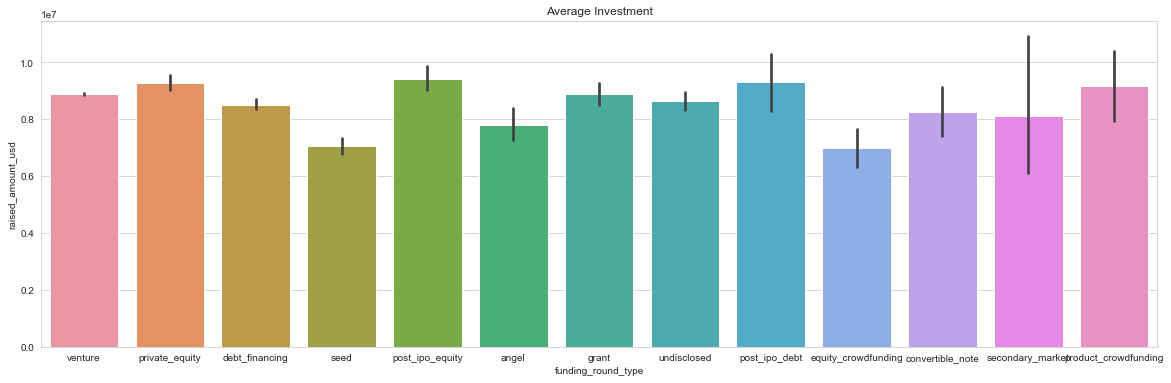

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#set a seaborn style
sns.set_style("whitegrid")
plt.figure(figsize = (20,6))
#master_frame2 is grouped data not in the below range its overall raised amount usd
master_frame2 = master_frame[(master_frame.raised_amount_usd>5000000)&(master_frame.raised_amount_usd<15000000)]
master_frame2

#np.argmax(R)          
sns.barplot(x='funding_round_type',y = 'raised_amount_usd',data = master_frame2)

#plt.yscale('log')
            
plt.title("Average Investment")
plt.show()



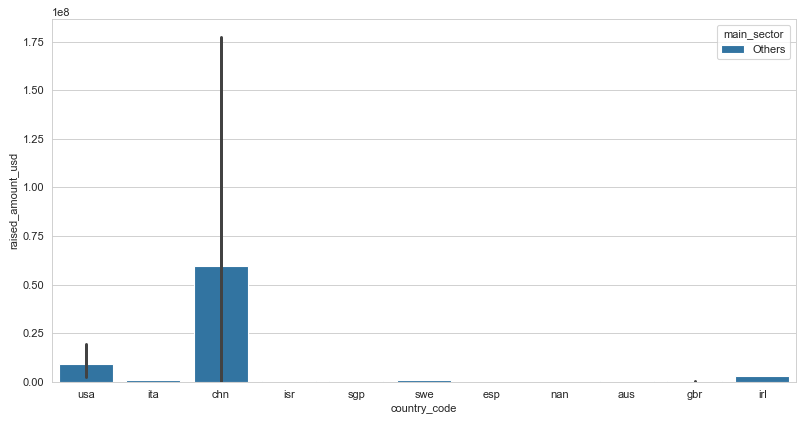

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(num = None,figsize=(12,6),dpi = 80,facecolor = 'w',edgecolor = 'k')
merge_frame = pd.concat([master_frame,master_frame1],axis = 1)
merge_frame['totalNumber'] = merge_frame.groupby('main_sector').raised_amount_usd.transform('count')
merge_frame.drop_duplicates()
merge_frame = merge_frame.nlargest(50,['totalNumber'])

sns.barplot(x = 'country_code', y = 'raised_amount_usd',hue = 'main_sector' ,data = merge_frame)


#plt.yscale('log')
plt.show()

C:\Users\Vasu\Anaconda3\lib\site-packages\pandas\core\frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


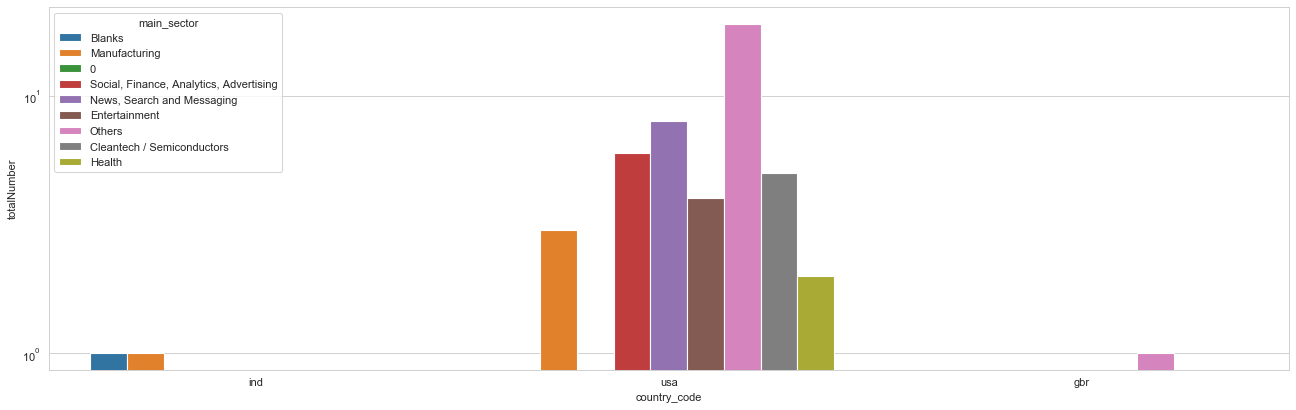

In [22]:
plt.figure(num = None,figsize=(20,6),dpi = 80,facecolor = 'w',edgecolor = 'k')
#D1 = D1.nlargest(9,'totalNumber')
#D2 = D2.nlargest(9,'totalNumber')
#D3 = D3.nlargest(9,'totalNumber')
D11 = D1.append(D2)
D = D11.append(D3)
sns.barplot(x = 'country_code',y = 'totalNumber',hue = 'main_sector', data = D)
plt.yscale('log')

plt.show()